In [53]:
%pip install numpy tensorflow scikit-learn torch numpy matplotlib transformers pandas sentence-transformers tf-keras

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


Bag-of-Words and Skip-gram

In [54]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example sentences
sentences = [
    ["I", "love", "chocolate"],
    ["I", "love", "ice", "cream"],
    ["I", "enjoy", "playing", "tennis"]
]

# Create vocabulary
vocab = set([word for sentence in sentences for word in sentence])
word2idx = {word: idx for idx, word in enumerate(vocab)}
idx2word = {idx: word for idx, word in enumerate(vocab)}
vocab_size = len(vocab)

# Generate training data
window_size = 4
train_data = []
for sentence in sentences:
    for i, target_word in enumerate(sentence):
        context_words = [sentence[j] for j in range(max(0, i - window_size), min(i + window_size + 1,len(sentence) )) if j>=0 and j != i]
        train_data.append((context_words, target_word))

print(train_data)

# Generate input and output pairs for CBOW
train_inputs, train_labels = [], []
for context_words, target_word in train_data:
    context_idxs = [word2idx[word] for word in context_words]
    train_inputs.append(context_idxs)
    train_labels.append(word2idx[target_word])

# print(train_inputs, train_labels)

# Convert to numpy arrays
train_inputs = pad_sequences(train_inputs, maxlen=window_size*2)
train_labels = np.array(train_labels)

# print(train_inputs, train_labels)
# Define CBOW model
embedding_dim = 10
cbow_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=window_size*2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=vocab_size, activation='softmax')
])

# Compile and train the CBOW model
cbow_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
cbow_model.fit(train_inputs, train_labels, epochs=10, verbose=1)

# Get the learned word embeddings
word_embeddings = cbow_model.get_weights()[0]

# Print the word embeddings
for i, embedding in enumerate(word_embeddings):
    word = idx2word[i]
    print(f"Word: {word}, Embedding: {embedding}")






from sklearn.metrics.pairwise import cosine_similarity

embedding_love = [ 0.01564056, -0.03947877, 0.05002572, 0.0192697, -0.02804992, 0.01769353,
  0.05988177, -0.02112248, 0.01724979, 0.00679414]

embedding_chocolate = [ 0.03700837, 0.02216908, -0.00719608, -0.03232071, -0.02043956, 0.01372782,
 -0.03494259, 0.04141612, -0.02659426, 0.00182522]

similarity = cosine_similarity([embedding_love], [embedding_chocolate])
print(similarity)




import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten

# Set up the training data
sentences = [["I", "love", "machine", "learning"],
             ["I", "like", "deep", "learning"],
             ["I", "enjoy", "neural", "networks"]]

# Create the skip-gram dataset
skip_gram_pairs = []
window_size = 2

for sentence in sentences:
    for i in range(len(sentence)):
        target_word = sentence[i]
        for j in range(i - window_size, i + window_size + 1):
            if j >= 0 and j < len(sentence) and j != i:
                context_word = sentence[j]
                skip_gram_pairs.append((target_word, context_word))

# Create word-to-index and index-to-word mappings
word_to_index = {}
index_to_word = {}
index = 0

for sentence in sentences:
    for word in sentence:
        if word not in word_to_index:
            word_to_index[word] = index
            index_to_word[index] = word
            index += 1

# Convert skip-gram pairs to indices
skip_gram_pairs_indices = []
for pair in skip_gram_pairs:
    target_index = word_to_index[pair[0]]
    context_index = word_to_index[pair[1]]
    skip_gram_pairs_indices.append((target_index, context_index))

# Define the model
vocab_size = len(word_to_index)
embedding_dim = 10

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=1))
model.add(Flatten())
model.add(Dense(vocab_size, activation='softmax'))

# Compile and train the model
model.compile(loss='categorical_crossentropy', optimizer='adam')
target_words = []
context_words = []

for pair in skip_gram_pairs_indices:
    target_words.append(pair[0])
    context_words.append(pair[1])

target_words = np.array(target_words)
context_words = np.array(context_words)

model.fit(target_words, tf.keras.utils.to_categorical(context_words, num_classes=vocab_size), epochs=100)

# Get the word embeddings
embeddings = model.get_weights()[0]

# Print the word embeddings
for i in range(vocab_size):
    word = index_to_word[i]
    embedding = embeddings[i]
    print(f"Word: {word}, Embedding: {embedding}")


[(['love', 'chocolate'], 'I'), (['I', 'chocolate'], 'love'), (['I', 'love'], 'chocolate'), (['love', 'ice', 'cream'], 'I'), (['I', 'ice', 'cream'], 'love'), (['I', 'love', 'cream'], 'ice'), (['I', 'love', 'ice'], 'cream'), (['enjoy', 'playing', 'tennis'], 'I'), (['I', 'playing', 'tennis'], 'enjoy'), (['I', 'enjoy', 'tennis'], 'playing'), (['I', 'enjoy', 'playing'], 'tennis')]
Epoch 1/10


/Users/7n100489/Library/CloudStorage/OneDrive-BankofAyudhyaPublicCompanyLimited/Desktop/Workspace/github/intro-to-ml-and-dl/.venv/lib/python3.13/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - loss: 2.0818
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.0788
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.0757
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.0727
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.0697
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.0667
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.0638
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.0608
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.0579
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.0549
Word: enjoy, Embedding: [ 0.02565144  0.04723404  0.01219276 -0.02737763  0.01268281  0.04115959
  0.00776505 -0.00327581  0.02911514 -0.03850525]
Word: ice, Embedding: [-0.03465841 -0.0040717   0.01518244  0.04751261  0.04240111  0.05283941
 -0.02309946  0.04888107 -0.05264969  0.01667166]
Word: chocolate, Embedding: [ 0.01097741 -0.05464938  0.01683971 -0.02803881 

/Users/7n100489/Library/CloudStorage/OneDrive-BankofAyudhyaPublicCompanyLimited/Desktop/Workspace/github/intro-to-ml-and-dl/.venv/lib/python3.13/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - loss: 2.1983
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.1968
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.1954
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.1940
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1926
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1912
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.1898
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.1884
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1870
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.1856
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1842
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.1828
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.1814
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1801
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.1787
Epoch 16/100
1/1 ━━━━━━━━━━━━━

Embedding Models: Global Vector (GloVe) for Word representations

In [55]:
from collections import defaultdict
import numpy as np
corpus = [    "I love chocolate",    "I love ice cream",    "I enjoy playing tennis"]
# Initialize vocabulary and co-occurrence matrix
vocab = set()
co_occurrence = defaultdict(float)

window_size = 4
# Iterate through the corpus to build vocabulary and co-occurrence matrix
for sentence in corpus:
    words = sentence.split()
    for i in range(len(words)):
        word = words[i]
        vocab.add(word)
        for j in range(max(0, i - window_size), min(i + window_size + 1, len(words))):
            if i != j:
                co_occurrence[(word, words[j])] += 1.0 / abs(i - j)


embedding_dim = 10
word_embeddings = {
    word: np.random.randn(embedding_dim) for word in vocab
}


learning_rate = 0.1
num_epochs = 100

# Gradient descent to update word embeddings
for epoch in range(num_epochs):
    total_loss = 0
    for (word_i, word_j), observed_count in co_occurrence.items():
        # Calculate dot product of word embeddings
        dot_product = np.dot(word_embeddings[word_i], word_embeddings[word_j])

        # Calculate difference and update
        diff = dot_product - np.log(observed_count)
        total_loss += 0.5 * diff**2
        gradient = diff * word_embeddings[word_j]
        word_embeddings[word_i] -= learning_rate * gradient

    print(f"Epoch: {epoch+1}, Loss: {total_loss}")

word_embeddings

Epoch: 1, Loss: 85.86138211524536
Epoch: 2, Loss: 6.555301863303688
Epoch: 3, Loss: 0.5757857008552768
Epoch: 4, Loss: 0.14325290358583195
Epoch: 5, Loss: 0.07119556767482517
Epoch: 6, Loss: 0.04238917113374091
Epoch: 7, Loss: 0.026622213969111158
Epoch: 8, Loss: 0.017172259209524327
Epoch: 9, Loss: 0.011111922461196997
Epoch: 10, Loss: 0.007221889558646358
Epoch: 11, Loss: 0.004698194530901059
Epoch: 12, Loss: 0.0030598523920348816
Epoch: 13, Loss: 0.0019939914098697866
Epoch: 14, Loss: 0.0013000802382031747
Epoch: 15, Loss: 0.0008479741821276863
Epoch: 16, Loss: 0.0005532639249120775
Epoch: 17, Loss: 0.00036107070391503104
Epoch: 18, Loss: 0.00023569063607060045
Epoch: 19, Loss: 0.00015387417487476045
Epoch: 20, Loss: 0.00010047289347413206
Epoch: 21, Loss: 6.561160851752599e-05
Epoch: 22, Loss: 4.285011242408401e-05
Epoch: 23, Loss: 2.7986933849198195e-05
Epoch: 24, Loss: 1.8280358137712287e-05
Epoch: 25, Loss: 1.194084818161504e-05
Epoch: 26, Loss: 7.800146314992211e-06
Epoch: 27, 

{'enjoy': array([-1.37877007, -1.18859155, -1.46545072, -0.63012226, -1.83680426,
         0.74242378,  0.14158734,  0.51806523, -0.64486357, -1.71681209]),
 'ice': array([-0.60625539, -0.80716018, -0.30569818,  1.38332308,  1.0508305 ,
         2.17494757, -0.13366162, -0.63886812,  0.28488969,  0.20104274]),
 'chocolate': array([-0.8089369 ,  0.60116452,  0.73503534,  2.12241674,  1.5354713 ,
        -2.26272038,  0.02693837, -0.77854906, -0.05946721,  0.73926498]),
 'love': array([-1.55391822,  0.20235154,  0.08526694, -0.41121632, -0.2553517 ,
        -0.06284376, -1.17253577, -0.49182823, -0.22435523, -0.92436515]),
 'tennis': array([ 0.15051887, -0.4135159 , -0.0051739 ,  1.93069501, -0.63017507,
         0.14948858, -1.01267125, -0.36843814,  0.54360153,  0.20492216]),
 'playing': array([-0.93832684,  2.99222518,  0.91505788, -0.42546599, -0.8365732 ,
         0.69847897, -1.54176741, -0.65916323, -0.02434544, -1.06276595]),
 'cream': array([ 0.80226485,  0.10361425,  1.87757674

Measure Embeddings cosine similarity scores for determining the similar context into Contextual Language Models

In [56]:
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
# Load an open-source embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')  # You can replace with another model if needed

def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)
    return dot_product / (norm_vector1 * norm_vector2)

def euclidean_distance(vector1, vector2):
    return np.linalg.norm(vector1 - vector2)

def get_embedding(word):
    """
    Gets the embedding for a given word using SentenceTransformer.
    """
    return model.encode(word)

# Define your words
# words = ["mouse", "pizza", "rome", "italian", "Italy", "italy"]
words = ["I", "love" ,"chocolate", "ice cream", "enjoy", "playing", "tennis"]
base_word = "Me"

# Construct DataFrame
df = pd.DataFrame(words, columns=["word_1"])
df["word_2"] = base_word

# Precompute embeddings for efficiency
embeddings = {word: get_embedding(word) for word in words + [base_word]}

# Compute similarity metrics
df["cosine_similarity"] = df.apply(lambda r: cosine_similarity(embeddings[r.word_1], embeddings[r.word_2]), axis=1)
df["euclidean_distance"] = df.apply(lambda r: euclidean_distance(embeddings[r.word_1], embeddings[r.word_2]), axis=1)

print(df)


      word_1 word_2  cosine_similarity  euclidean_distance
0          I     Me           0.653914            0.831969
1       love     Me           0.373178            1.119663
2  chocolate     Me           0.267308            1.210530
3  ice cream     Me           0.237702            1.234745
4      enjoy     Me           0.198246            1.266297
5    playing     Me           0.329232            1.158247
6     tennis     Me           0.166011            1.291502


Example of Completing Contextual Langauge Processing

['Un', 'bel', 'iev', 'able', '!']


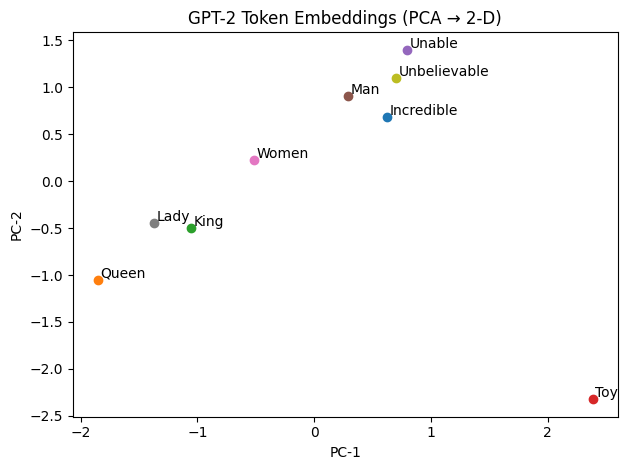

Incredible: [-0.079 -0.026  0.043 -0.106 -0.082]
Queen: [ 0.119 -0.138  0.236  0.006 -0.087]
 King: [ 0.102 -0.138  0.262 -0.051 -0.118]
  Toy: [ 0.333 -0.106  0.223 -0.105 -0.278]
Unable: [0.072 0.067 0.067 0.044 0.056]
  Man: [-0.028 -0.056  0.065 -0.017 -0.081]
Women: [-0.024  0.12   0.035 -0.014  0.01 ]
 Lady: [ 0.017 -0.1    0.164 -0.202  0.073]
Unbelievable: [0.032 0.024 0.097 0.028 0.036]


In [57]:
# !pip install torch transformers scikit-learn matplotlib --quiet

# =========================
# 1. Setup
# =========================
import torch
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModel
from sklearn.decomposition import PCA   # swap for TSNE if you prefer
from transformers import AutoTokenizer

#----- text examples ----------
# Text to tokenize
text = "Unbelievable!"

# Initialize GPT-2 tokenizer
tok = AutoTokenizer.from_pretrained("gpt2")

# Tokenize the text and print the tokens
# This will split the text into subword tokens that GPT-2 can understand
print(tok.tokenize(text))    # Output: ['Un', 'bel', 'iev', 'able', '!']
#------------------------------

# =========================
# 2. Load Model and Tokenizer
# =========================
model_name = "gpt2"                     # Model to be used

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(
    model_name,
    torch_dtype=torch.float16,          # keeps RAM low without hurting the embeddings
    low_cpu_mem_usage=True,
    ).eval()                            # Puts the model in evaluation mode

# =========================
# 3. Tokenize & Create vector embedding
# =========================
WORDS = ["Incredible", "Queen", "King", "Toy", "Unable", "Man", "Women", "Lady", "Unbelievable"]        # Words to be tokenised

embed_vectors = []
for word in WORDS:
    ids          = tok(word, add_special_tokens=False)["input_ids"]
    ids_t        = torch.tensor(ids).unsqueeze(0)         # shape: (1, tokens)
    with torch.no_grad():
        token_vecs = model.get_input_embeddings()(ids_t)  # shape: (1, tokens, 768)
    # Pool sub-word pieces → single 768-D vector (mean works fine for single words)
    embed_vectors.append(token_vecs.mean(dim=1).squeeze().cpu().numpy())

vecs = np.stack(embed_vectors)             # List -> Matrix | shape: (len(WORDS), 768)

# =========================
# 4. PCA (Reduce to 2-D) & Visualisation
# =========================

coords = PCA(n_components=2, random_state=0).fit_transform(vecs)

plt.figure()
for (x, y), label in zip(coords, WORDS):
    plt.scatter(x, y)
    plt.text(x + 0.02, y + 0.02, label)
plt.title("GPT-2 Token Embeddings (PCA → 2-D)")
plt.xlabel("PC-1");  plt.ylabel("PC-2");  plt.tight_layout();  plt.show()

# Print the first few dimensions of the vectors
for w, v in zip(WORDS, vecs):
    print(f"{w:>5}: {np.round(v[:5], 3)}")

In [58]:
import torch

# Define sequence length and embedding dimension
seq_len, d_model = 10, 8  # seq_len: number of positions, d_model: embedding dimension

# Create position indices tensor of shape (seq_len, 1)
pos = torch.arange(seq_len).unsqueeze(1)  # [[0], [1], [2], ..., [9]]

# Create dimension indices for even dimensions: [0, 2, 4, 6]
idx = torch.arange(0, d_model, 2)

# Calculate frequency/angle rates for each dimension
# As idx/d_model increases, 10000^(idx/d_model) increases exponentially
# This creates frequencies that vary from high (small idx) to low (large idx)
angle_rates = 1 / (10000 ** (idx / d_model))

# Initialize positional encoding matrix of shape (seq_len, d_model)
pe = torch.zeros(seq_len, d_model)

# Fill even indices with sine and odd indices with cosine
# pos * angle_rates creates a matrix of angles by broadcasting
pe[:, 0::2] = torch.sin(pos * angle_rates)  # sin for even dimensions (0,2,4,6)
pe[:, 1::2] = torch.cos(pos * angle_rates)  # cos for odd dimensions (1,3,5,7)

pe

tensor([[ 0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
          1.0000e+00,  0.0000e+00,  1.0000e+00],
        [ 8.4147e-01,  5.4030e-01,  9.9833e-02,  9.9500e-01,  9.9998e-03,
          9.9995e-01,  1.0000e-03,  1.0000e+00],
        [ 9.0930e-01, -4.1615e-01,  1.9867e-01,  9.8007e-01,  1.9999e-02,
          9.9980e-01,  2.0000e-03,  1.0000e+00],
        [ 1.4112e-01, -9.8999e-01,  2.9552e-01,  9.5534e-01,  2.9995e-02,
          9.9955e-01,  3.0000e-03,  1.0000e+00],
        [-7.5680e-01, -6.5364e-01,  3.8942e-01,  9.2106e-01,  3.9989e-02,
          9.9920e-01,  4.0000e-03,  9.9999e-01],
        [-9.5892e-01,  2.8366e-01,  4.7943e-01,  8.7758e-01,  4.9979e-02,
          9.9875e-01,  5.0000e-03,  9.9999e-01],
        [-2.7942e-01,  9.6017e-01,  5.6464e-01,  8.2534e-01,  5.9964e-02,
          9.9820e-01,  6.0000e-03,  9.9998e-01],
        [ 6.5699e-01,  7.5390e-01,  6.4422e-01,  7.6484e-01,  6.9943e-02,
          9.9755e-01,  6.9999e-03,  9.9998e-01],
        [ 9.8936

In [59]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch.nn.functional as F

# Initialize model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModelForCausalLM.from_pretrained("gpt2")

# Print total number of tokens in GPT-2's vocabulary
print("GPT-2 vocab size:", tokenizer.vocab_size) # (should be 50257)

# Get vocabulary as list of (token, id) tuples and shuffle randomly
vocab_items = list(tokenizer.get_vocab().items())
np.random.shuffle(vocab_items)

# Print first 10 random token-ID pairs from vocabulary
# Token is displayed with repr() to show special characters/whitespace
print("\nSample of token→ID mappings:")
for token, idx in vocab_items[:10]:
    print(f"{idx:5d} → {repr(token)}")

# Input text to predict next token for
text = "Hello, how are you"

# Tokenize input
inputs = tokenizer(text, return_tensors="pt")

# Get model predictions
with torch.no_grad():  # No need to track gradients for inference
    outputs = model(**inputs)

# Get logits for last token
logits = outputs.logits[:, -1, :]  # Shape: [batch_size, vocab_size] -> torch.Size([1, 50257]) in this case

# Get raw logits for top 5 tokens before softmax
top_k = 5
top_logits, top_indices = torch.topk(logits[0], top_k)

# Convert logits to probabilities using softmax
probs = F.softmax(logits, dim=-1)

# Get top 5 probabilities after softmax
top_probs = probs[0][top_indices]

print(f"\nTop {top_k} predictions for next token after '{text}':")
print("-" * 50)
print("Raw Logits vs Softmax Probabilities")
print("-" * 50)
for logit, prob, idx in zip(top_logits, top_probs, top_indices):
    token = tokenizer.decode([idx])
    print(f"Token ID: {idx} | Token: {token:10} | Logit: {logit:.4f} | Probability: {prob:.4f}")



GPT-2 vocab size: 50257

Sample of token→ID mappings:
46871 → '773'
16498 → 'Ġdare'
26001 → 'FB'
37504 → 'ĠCrate'
18175 → 'Ġsuppress'
16587 → 'Deb'
 6986 → 'Ġessentially'
30099 → 'Fair'
20208 → 'Ġminus'
28116 → 'sever'

Top 5 predictions for next token after 'Hello, how are you':
--------------------------------------------------
Raw Logits vs Softmax Probabilities
--------------------------------------------------
Token ID: 1804 | Token:  doing     | Logit: -93.1169 | Probability: 0.2651
Token ID: 30 | Token: ?          | Logit: -93.6844 | Probability: 0.1503
Token ID: 4203 | Token:  feeling   | Logit: -93.7024 | Probability: 0.1476
Token ID: 1701 | Token: ?"         | Logit: -94.3398 | Probability: 0.0780
Token ID: 11 | Token: ,          | Logit: -95.1794 | Probability: 0.0337


----
# Homework

1. สร้างประโยคใหม่ "I am good at anwsering questions and I can take the test and pass the finance exam." จงนำ Contextual sentences แปลงเป็น Embeddings (ด้วยวิธีใดก็ได้) และให้คะแนนความคล้าย (Similarity score) ด้วยการวัดแบบ Euclidean และ Cosine similarity

2. นำประโยคเพียง "I am good at anwsering questions and I can take the test and pass the finance" ไปทำแปลงผ่าน Autotokenizer เป็น Embedding vectors ด้วยโมเดล GPT-2 และสร้างคำใหม่ผ่าน GPT-2 เช่นกัน ผลลัพธ์ที่ได้เป็นคำใดต่อไปใน 10 อันดับแรกของการทำนาย (Top-10) มีความน่าจะเป็นเท่าใด

# 1.

In [61]:
sentence = "I am good at answering questions and I can take the test and pass the finance exam."

context_sentences = [
    "I can easily answer questions and pass exams.",
    "He enjoys playing football on weekends.",
    "I am confident in taking finance tests.",
]

model = SentenceTransformer("all-MiniLM-L6-v2")


def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)
    return dot_product / (norm_vector1 * norm_vector2)


def euclidean_distance(vector1, vector2):
    return np.linalg.norm(vector1 - vector2)


sentence_emb = model.encode([sentence])[0]
context_embs = model.encode(context_sentences)

rows = []
for sent, emb in zip(context_sentences, context_embs):
    rows.append(
        {
            "sentence_1": sent,
            "sentence_2": sentence,
            "cosine_similarity": cosine_similarity(sentence_emb, emb),
            "euclidean_distance": euclidean_distance(sentence_emb, emb),
        }
    )

df = pd.DataFrame(rows)
print(df)


                                      sentence_1  \
0  I can easily answer questions and pass exams.   
1        He enjoys playing football on weekends.   
2        I am confident in taking finance tests.   

                                          sentence_2  cosine_similarity  \
0  I am good at answering questions and I can tak...           0.710021   
1  I am good at answering questions and I can tak...           0.153136   
2  I am good at answering questions and I can tak...           0.711920   

   euclidean_distance  
0            0.761549  
1            1.301433  
2            0.759053  


# 2.

In [62]:
text = "I am good at answering questions and I can take the test and pass the finance"
model = AutoModelForCausalLM.from_pretrained("gpt2")


tokenizer = AutoTokenizer.from_pretrained("gpt2")

inputs = tokenizer(text, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)

logits = outputs.logits[:, -1, :]

top_k = 10
top_logits, top_indices = torch.topk(logits[0], top_k)

probs = F.softmax(logits, dim=-1)

top_probs = probs[0][top_indices]

print(f"\nTop {top_k} predictions for next token after '{text}':")
print("-" * 50)
print("Raw Logits vs Softmax Probabilities")
print("-" * 50)
for logit, prob, idx in zip(top_logits, top_probs, top_indices):
    token = tokenizer.decode([idx])
    print(
        f"Token ID: {idx} | Token: {token:10} | Logit: {logit:.4f} | Probability: {prob:.4f}"
    )


Top 10 predictions for next token after 'I am good at answering questions and I can take the test and pass the finance':
--------------------------------------------------
Raw Logits vs Softmax Probabilities
--------------------------------------------------
Token ID: 1332 | Token:  test      | Logit: -101.1120 | Probability: 0.4680
Token ID: 2814 | Token:  exam      | Logit: -102.5151 | Probability: 0.1150
Token ID: 13 | Token: .          | Logit: -103.5584 | Probability: 0.0405
Token ID: 1781 | Token:  course    | Logit: -103.6683 | Probability: 0.0363
Token ID: 5254 | Token:  tests     | Logit: -104.0019 | Probability: 0.0260
Token ID: 1808 | Token:  question  | Logit: -104.1765 | Probability: 0.0218
Token ID: 1398 | Token:  class     | Logit: -104.3596 | Probability: 0.0182
Token ID: 26420 | Token:  exams     | Logit: -104.3636 | Probability: 0.0181
Token ID: 2683 | Token:  questions | Logit: -104.8977 | Probability: 0.0106
Token ID: 290 | Token:  and       | Logit: -105.1881 | Pr